## Forcing for Aral Sea Run

In [11]:
import logging
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from pathlib import Path

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [12]:
import xarray as xr
from rich import print

import ewatercycle.forcing

In [13]:
#camelsgb_id = "camelsgb_73010"
station_id = "AralSeaBasin"
shape_file_name = "AralSeaBasin"

experiment_start_date="1987-01-01T00:00:00Z"
experiment_end_date="1995-12-31T00:00:00Z"

In [14]:
shapefile_path = (
    Path.cwd()
    / "AralSea_Basin"
    / f"{shape_file_name}.shp"
)

In [15]:
shapefile_path

PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin/AralSeaBasin.shp')

In [16]:


forcing_path_pcrglobwb = (
    Path.cwd()
    / "forcing_8795"
    / station_id
    / "pcrglobwb"
)


In [17]:
forcing_path_pcrglobwb

PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_8795/AralSeaBasin/pcrglobwb')

In [18]:
esmvaltool_padding = 2

pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset="ERA5",
    start_time=experiment_start_date,
    end_time="1995-12-31T00:00:00Z",
    start_time_climatology=experiment_start_date,
    end_time_climatology="1995-12-31T00:00:00Z",
    shape=shapefile_path,
    extract_region={
    "start_longitude": 53-esmvaltool_padding,
    "end_longitude": 80+esmvaltool_padding,
    "start_latitude": 34-esmvaltool_padding,
    "end_latitude": 52+esmvaltool_padding,},
    directory = forcing_path_pcrglobwb

)

#    "sonoran_desert": {"latitude": (25, 34), "longitude": (-116, -110)},
#    "Aral_Basin": {"latitude": (34,52),"longitude":(53,80)},

In [19]:
print(pcrglobwb_forcing)

PCRGlobWBForcing(
    start_time='1987-01-01T00:00:00Z',
    end_time='1995-12-31T00:00:00Z',
    directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_8795/AralSeaBasin/pcrglobwb/work/diagnostic/script'),
    shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_pro
gress/Test_Aral/AralSea_Basin/AralSeaBasin.shp'),
    filenames={},
    precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1987-1995_AralSeaBasin.nc',
    temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1987-1995_AralSeaBasin.nc'
)

<xarray.Dataset> Size: 163MB
Dimensions:    (time: 3652, lat: 89, lon: 125, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 29kB 1986-01-01 1986-01-02 ... 1995-12-31
  * lat        (lat) float32 356B 54.0 53.75 53.5 53.25 ... 32.5 32.25 32.0
  * lon        (lon) float32 500B 51.0 51.25 51.5 51.75 ... 81.5 81.75 82.0
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 163MB 260.1 260.0 260.1 ... 256.7 257.6
    time_bnds  (time, bnds) datetime64[ns] 58kB 1985-12-31T12:00:00 ... 1995-...
    lat_bnds   (lat, bnds) float32 712B 54.12 53.88 53.88 ... 32.12 32.12 31.88
    lon_bnds   (lon, bnds) float32 1kB 50.88 51.12 51.12 ... 81.88 81.88 82.12
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.11.1
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset> Size: 163MB
Dimensions:    (time: 3652, lat: 89, lon: 125, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 29kB 1986-01-01 1986-01-02 ... 1995-12-31
  * lat        (lat) float32 356B 54.0 53.75 53.5 53.25 ... 32.5 32.25 32.0
  * lon        (lon) float32 500B 51.0 51.25 51.5 51.75 ... 81.5 81.75 82.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 163MB 0.0007897 0.0008114 ... 0.0001156
    time_bnds  (time, bnds) datetime64[ns] 58kB 1985-12-31T12:00:00 ... 1995-...
    lat_bnds   (lat, bnds) float32 712B 54.12 53.88 53.88 ... 32.12 32.12 31.88
    lon_bnds   (lon, bnds) float32 1kB 50.88 51.12 51.12 ... 81.88 81.88 82.12
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.11.1
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

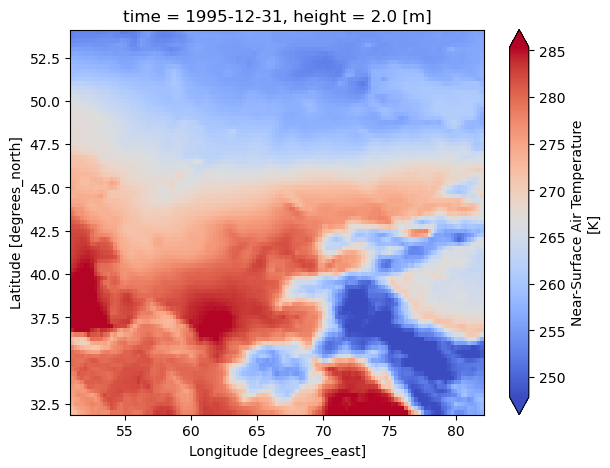

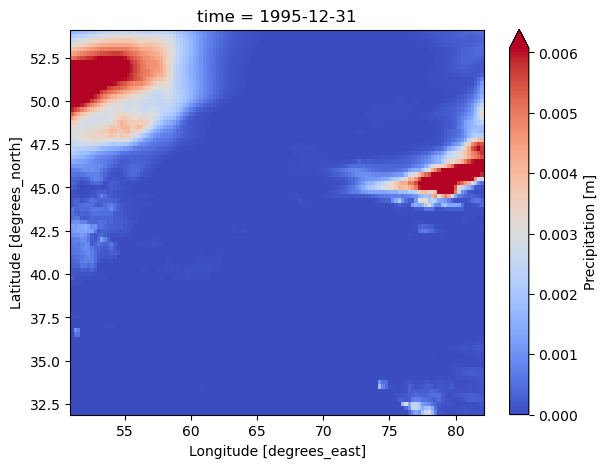

In [20]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)